<a href="https://colab.research.google.com/github/TGADEstadisticaI/EstadisticaI/blob/main/5%20Descriptiva/TGAD_Estad%C3%ADstica_Clase_U5_con_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<figure>
<center>
<img src='https://www.economicas.uba.ar/wp-content/uploads/2020/08/cropped-logo_FCE.png' />
</figure>

# **Universidad de Buenos Aires**
## **Facultad de Ciencias Económicas**

### **Estadística I**

### Cátedra: Bianco

#### **Ejemplos de Clase U5 con Python**

***Material elaborado por la profesora Natalia Salaberry***

###**Librerías**

In [ ]:
import pandas as pd
import requests
import numpy as np
import sympy
import statistics as ss
import math
from IPython.display import display, Math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

###Ejemplo 1

\begin{equation}
\begin{array}{|c|c|c|c|c|c|c|c|c|c|}
    \hline
    X \\
    \hline
    2 \\
    \hline
    3 \\
    \hline
    4 \\
    \hline
    5 \\
    \hline
    2 \\
    \hline
\end{array}
\end{equation}

In [ ]:
data=pd.DataFrame({'X': [2, 3, 4, 5, 2]})

data

,X
0,2
1,3
2,4
3,5
4,2


In [ ]:
#obtenemos las frecuencia absoluta
datafinal=pd.DataFrame(data.groupby(data['X']).X.count())
datafinal.columns=['Fa']
datafinal.reset_index(drop=False, inplace=True)
datafinal

,X,Fa
0,2,2
1,3,1
2,4,1
3,5,1


In [ ]:
#frecuencia abs. relativa
datafinal['Far']=datafinal['Fa']/sum(datafinal['Fa'])

#frecuencia abs. acumulada
datafinal['Fc']= datafinal.Fa.cumsum()

#frecuencia abs. relativa
datafinal['Fcr']=round((datafinal['Fc']/sum(datafinal['Fa']))*100,2)

datafinal

,X,Fa,Far,Fc,Fcr
0,2,2,0.4,2,40.0
1,3,1,0.2,3,60.0
2,4,1,0.2,4,80.0
3,5,1,0.2,5,100.0


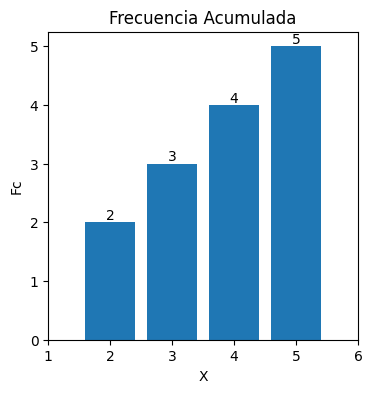

In [ ]:
#gráfico de barras
fig, ax = plt.subplots(figsize=(4,4)) #para poder operar sobre los ejes (ax) y el dibujo en si (fig)
bars=plt.bar(datafinal['X'], datafinal['Fc'])

# se agregan etiquetas en las barras
ax.bar_label(bars)

ax.set_xlabel('X')
ax.set_ylabel('Fc')
ax.set_title('Frecuencia Acumulada')

#determinar etiquetas eje x
ax.set_xlim(1,6)

plt.show() #evita que aparezca texto previo

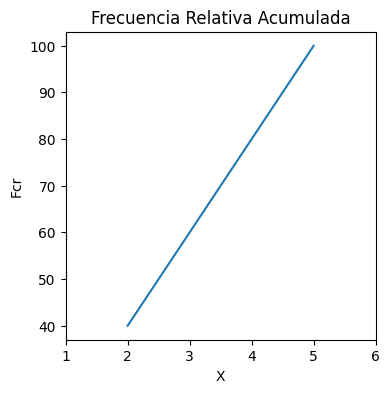

In [ ]:
#gráfico de barras
fig, ax = plt.subplots(figsize=(4,4)) #para poder operar sobre los ejes (ax) y el dibujo en si (fig)
bars=plt.plot(datafinal['X'], datafinal['Fcr'])

# se agregan etiquetas en las barras
#ax.bar_label(bars)

ax.set_xlabel('X')
ax.set_ylabel('Fcr')
ax.set_title('Frecuencia Relativa Acumulada')

#determinar etiquetas eje x
ax.set_xlim(1,6)

plt.show() #evita que aparezca texto previo

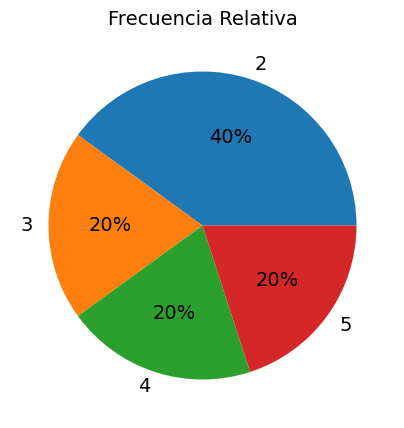

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))

plt.pie(datafinal['Fa'], labels = datafinal["X"], autopct='%1.0f%%', textprops={'fontsize': 14})

plt.title('Frecuencia Relativa', fontsize=14)

plt.show()

In [ ]:
display(Math(r'Media \thinspace Muestral \thinspace \bar{X} = {\sum_{i=1}^n x_i\over n}={16 \over 5}='+str(round(np.mean(data['X']),6))))
print('')
display(Math(r'Moda \thinspace {X_{mo}} ='+str(data['X'].mode()[0])))
print('')
display(Math(r'Mediana \thinspace X_{me}: Distancia=k*(n-1) \thinspace donde \thinspace k \thinspace es \thinspace el \thinspace porcentaje=0.5*(5-1)=2 \thinspace si \thinspace es \thinspace entero \thinspace directamente \thinspace es \thinspace la \thinspace posición =>X_2='+str(round(np.median(data['X']),6))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
display(Math(r' Q_1 = P_25=>Distancia=k*(n-1)=0,25*(5-1)=1=>'+str(np.percentile(data['X'], [25])[0])))
print('')
display(Math(r' Q_2 = X_{me} = P_50=D_5=Distancia=k*(n-1)=0,5*(5-1)=2=>'+str(np.percentile(data['X'], [50])[0])))
print('')
display(Math(r' Q_3 = P_75=Distancia=k*(n-1)=0,75*(5-1)= 3=>'+str(np.percentile(data['X'], [75])[0])))
print('')
display(Math(r' D_7 = P_70 => Distancia=k*(n-1)=0,70*(5-1)=2,8 => \thinspace como \thinspace no \thinspace es \thinspace entero, \thinspace se \thinspace debe \thinspace interpolar =3 + 0,8*(4– 3) =3+[0,8* (1)]='+str(np.percentile(data['X'], [70])[0])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
display(Math(r'Rango = X_{max} - X_{min} ='+str(data['X'].max()-data['X'].min())))
print('')
display(Math(r'RIC = Q3 - Q1 ='+str(np.percentile(data['X'], [75])[0]-np.percentile(data['X'], [25])[0])))
print('')
display(Math(r'Varianza \thinspace Muestral \thinspace V{(X)} = {{\sum_{i=1}^n (x_i - \bar{X})^2}\over n-1}='+str(round(data['X'].var(),3))))
print('')
display(Math(r'Desvío \thinspace Muestral \thinspace D{(X)} = \sqrt {V(X)}='+str(round((data['X'].var())**0.5,6))))
print('')
display(Math(r'CV{(X)} = {S \over \bar X}='+str(round((data['X'].var())**0.5 /np.mean(data['X']),2))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
display(Math(r'Coefciente \thinspace Asimetría \thinspace A_s = {n \over {(n-1)(n-2)}}{\sum_{i=1}^n ({x_i - \bar{X} \over S})^3}='+str(round(data['X'].skew(),3))))
print('')
display(Math(r'Coefciente \thinspace Curtosis \thinspace k = {n(n+1) \over {(n-1)(n-2)(n-3)}}{\sum_{i=1}^n ({x_i - \bar{X} \over S})^4}-{3(n-1)^2 \over {(n-2)(n-3)}}='+str(round(data['X'].kurtosis(),3))))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Ejemplo 2

Dadas las ventas de supermercados entre enero y noviembre 2022
se buscar generar información para responder las siguientes preguntas:

A) ¿Cuál es el monto promedio vendido por los supermercados?

B) ¿En qué mes el monto vendido alcanza el 50% de las ventas?

C) ¿En qué mes el monto vendido alcanza el 75% de las ventas?

D) ¿En qué mes el monto vendido es mínimo para el 25% superior de las
ventas?

E) ¿En qué mes el monto vendido es máximo para el 25% de las ventas?

F) ¿Entre qué valores se encuentran las ventas de los supermercados?

G) ¿Entre qué meses se encuentra el 50% de las ventas y cuál es el monto acumulado?

H) ¿Cuál es la variabilidad de montos vendidos en el período dado?

I) ¿Cuál es la variabilidad de montos vendidos en la misma unidad de medida que los montos
en el período dado?

J) ¿Recomendaría utilizar la media de los montos vendidos como medida a ser informada?

In [ ]:
super=pd.DataFrame({'Período':['ene-22', 'feb-22', 'mar-22', 'abr-22', 'may-22', 'jun-22', 'jul-22', 'ago-22', 'sep-22', 'oct-22','nov-22'],
                    'Ventas':[23.33, 24.21, 29.38, 30.03, 31.5, 33.92, 39.73, 37.06, 38.92, 41.67, 46.61]})
super

,Período,Ventas
0,ene-22,23.33
1,feb-22,24.21
2,mar-22,29.38
3,abr-22,30.03
4,may-22,31.50
5,jun-22,33.92
6,jul-22,39.73
7,ago-22,37.06
8,sep-22,38.92
9,oct-22,41.67


In [ ]:
display(Math(r'A) \thinspace Media='+str(round(super['Ventas'].mean(),2))))

<IPython.core.display.Math object>

In [ ]:
display(Math(r'B) \thinspace Mediana='+str(round(super['Ventas'].median(),2))))
print('ahora buscamos el mes al que se corresponde este valor (o el más cercano)')
if round(super['Ventas'].median(),2) in (super['Ventas']):
  idx = round(super['Ventas'].median(),2).index[0]
else:
  idx = (super["Ventas"] - round(super['Ventas'].median(),2)).abs().idxmin()
super["Período"].loc[idx]


<IPython.core.display.Math object>

ahora buscamos el mes al que se corresponde este valor (o el más cercano)


'jun-22'

In [ ]:
display(Math(r'C) \thinspace P_75='+str(round(np.percentile(super['Ventas'], [75])[0],2))))
print('ahora buscamos el mes al que se corresponde este valor (o el más cercano)')
if round(np.percentile(super['Ventas'], [75])[0],2) in (super['Ventas']):
  idx = round(np.percentile(super['Ventas'], [75])[0],2).index[0]
else:
  idx = (super["Ventas"] - round(np.percentile(super['Ventas'], [75])[0],2)).abs().idxmin()
super["Período"].loc[idx]

<IPython.core.display.Math object>

ahora buscamos el mes al que se corresponde este valor (o el más cercano)


'jul-22'

In [ ]:
display(Math(r'D) \thinspace P_75='+str(round(np.percentile(super['Ventas'], [75])[0],2))))
print('ahora buscamos el mes al que se corresponde este valor (o el más cercano)')
if round(np.percentile(super['Ventas'], [75])[0],2) in (super['Ventas']):
  idx = round(np.percentile(super['Ventas'], [75])[0],2).index[0]
else:
  idx = (super["Ventas"] - round(np.percentile(super['Ventas'], [75])[0],2)).abs().idxmin()
super["Período"].loc[idx]

<IPython.core.display.Math object>

ahora buscamos el mes al que se corresponde este valor (o el más cercano)


'jul-22'

In [ ]:
display(Math(r'E) \thinspace P_25='+str(round(np.percentile(super['Ventas'], [25])[0],2))))
print('ahora buscamos el mes al que se corresponde este valor (o el más cercano)')
if round(np.percentile(super['Ventas'], [25])[0],2) in (super['Ventas']):
  idx = round(np.percentile(super['Ventas'], [25])[0],2).index[0]
else:
  idx = (super["Ventas"] - round(np.percentile(super['Ventas'], [25])[0],2)).abs().idxmin()
super["Período"].loc[idx]

<IPython.core.display.Math object>

ahora buscamos el mes al que se corresponde este valor (o el más cercano)


'mar-22'

In [ ]:
display(Math(r'F) \thinspace P_{25}='+str(round(np.percentile(super['Ventas'], [25])[0],2))))
display(Math(r'P_{75}='+str(round(np.percentile(super['Ventas'], [75])[0],2))))
display(Math(r'Monto \thinspace acumulado \thinspace RIC='+str(round(np.percentile(super['Ventas'], [75])[0]-np.percentile(super['Ventas'], [25])[0],2))))
print('ahora buscamos los meses')

if round(np.percentile(super['Ventas'], [25])[0],2) in (super['Ventas']):
  idx1 = round(np.percentile(super['Ventas'], [25])[0],2).index[0]
else:
  idx1 = (super["Ventas"] - round(np.percentile(super['Ventas'], [25])[0],2)).abs().idxmin()
mesmin=super["Período"].loc[idx1]

if round(np.percentile(super['Ventas'], [75])[0],2) in (super['Ventas']):
  idx = round(np.percentile(super['Ventas'], [75])[0],2).index[0]
else:
  idx = (super["Ventas"] - round(np.percentile(super['Ventas'], [75])[0],2)).abs().idxmin()
mesmax=super["Período"].loc[idx]

print('el 50% se encuentra entre '+mesmin+' y '+mesmax)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

ahora buscamos los meses
el 50% se encuentra entre mar-22 y jul-22


In [ ]:
display(Math(r'G) \thinspace V(X)='+str(round(super['Ventas'].var(),2))))

<IPython.core.display.Math object>

In [ ]:
display(Math(r'H) \thinspace D(X)='+str(round(super['Ventas'].var()**0.5,2))))

<IPython.core.display.Math object>

In [ ]:
display(Math(r'I) \thinspace CV(X)='+str(round(super['Ventas'].var()**0.5,2)/round(super['Ventas'].mean()))))
A=input('¿Recomendaría utilizar la media de los montos vendidos como medida a ser informada? ')

<IPython.core.display.Math object>

¿Recomendaría utilizar la media de los montos vendidos como medida a ser informada? Si


###Ejemplo 3

Se tomaron las cotizaciones de las acciones de Google (GOOG) y Amazon (AMZN) para
el período 1/6/2023 a 1/7/2023. Los boxplots correspondientes se encuentran en la siguiente
imagen. Se dispone además de algunas medidas estadísticas.

In [ ]:
import yfinance as yf
import pandas as pd

In [ ]:
Datos_GOOG = pd.DataFrame(yf.download('GOOGL', start='2023-06-1', end='2023-07-01')).reset_index()
Datos_GOOG=Datos_GOOG.assign(SYMBOL_YAHOO_FINANCE='GOOG')
Datos_GOOG.columns=Datos_GOOG.columns.droplevel(1)
Datos_AMZN = pd.DataFrame(yf.download('AMZN', start='2023-06-1', end='2023-07-01')).reset_index()
Datos_AMZN=Datos_AMZN.assign(SYMBOL_YAHOO_FINANCE='AMZN')
Datos_AMZN.columns=Datos_AMZN.columns.droplevel(1)

#GENERACIÓN DE UN SOLO DATAFRAME
DATA_YAHOO=pd.concat([Datos_GOOG,Datos_AMZN])
#RESETEO DE INDICE
DATA_YAHOO.reset_index(drop=True, inplace=True)
DATA_YAHOO

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume,SYMBOL_YAHOO_FINANCE
0,2023-06-01,122.982437,123.678261,121.888996,122.087801,30772700,GOOG
1,2023-06-02,123.926765,125.397946,123.022194,123.250819,26963100,GOOG
2,2023-06-05,125.258781,126.670314,123.101712,123.270705,32305500,GOOG
3,2023-06-06,126.551033,127.525186,124.612661,125.258788,26638300,GOOG
4,2023-06-07,121.769707,128.270711,121.391975,126.213060,52539000,GOOG
5,2023-06-08,121.411850,122.495356,120.517214,121.501317,29389200,GOOG
6,2023-06-09,121.501312,123.022190,121.183220,121.521190,23762500,GOOG
7,2023-06-12,122.902908,123.310468,120.934717,122.057977,28306400,GOOG
8,2023-06-13,123.091782,124.413855,122.445655,124.234927,22278300,GOOG
9,2023-06-14,122.932724,123.310463,120.725958,122.366122,30592300,GOOG


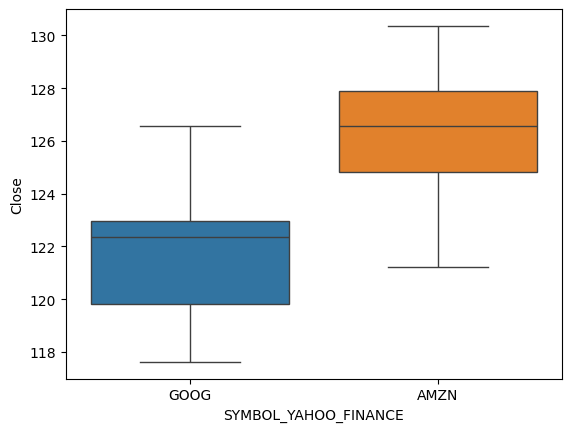

In [ ]:
import seaborn as sns
g = sns.boxplot(x="SYMBOL_YAHOO_FINANCE", y="Close", data=DATA_YAHOO, hue="SYMBOL_YAHOO_FINANCE")

In [ ]:
#cálculo de las medidas estadística y formato a dataframe

#se traspone el DataFrame creado
n=pd.DataFrame(round(DATA_YAHOO.groupby(['SYMBOL_YAHOO_FINANCE'])['Close'].count(),1)).transpose().reset_index(drop=True).assign(Estadística='N')
#cálculo de la media
medias = pd.DataFrame(round(DATA_YAHOO.groupby(['SYMBOL_YAHOO_FINANCE'])['Close'].mean(),1)).transpose().reset_index(drop=True).assign(Estadística='MEDIA')
#cálculo de la mediana
medianas = pd.DataFrame(round(DATA_YAHOO.groupby(['SYMBOL_YAHOO_FINANCE'])['Close'].median(),1)).transpose().reset_index(drop=True).assign(Estadística='MEDIANA')
#cálculo de la desvío
desvíos= pd.DataFrame(round(DATA_YAHOO.groupby(['SYMBOL_YAHOO_FINANCE'])['Close'].std(),2)).transpose().reset_index(drop=True).assign(Estadística='DESVÍO')
#cálculo de mínimo
min= pd.DataFrame(round(DATA_YAHOO.groupby(['SYMBOL_YAHOO_FINANCE'])['Close'].min(),1)).transpose().reset_index(drop=True).assign(Estadística='MIN')
#cálculo de máximo
max= pd.DataFrame(round(DATA_YAHOO.groupby(['SYMBOL_YAHOO_FINANCE'])['Close'].max(),1)).transpose().reset_index(drop=True).assign(Estadística='MAX')
#cálculo de percentiles
P5=pd.DataFrame([round(DATA_YAHOO.groupby(['SYMBOL_YAHOO_FINANCE'])['Close'].quantile([.05]),1)[0], round(DATA_YAHOO.groupby(['SYMBOL_YAHOO_FINANCE'])['Close'].quantile([.05]),1)[1]]).transpose().reset_index(drop=True).assign(Estadística='P05')
P5.columns =['AMZN', 'GOOG', 'Estadística']
P10=pd.DataFrame([round(DATA_YAHOO.groupby(['SYMBOL_YAHOO_FINANCE'])['Close'].quantile([.10]),1)[0], round(DATA_YAHOO.groupby(['SYMBOL_YAHOO_FINANCE'])['Close'].quantile([.10]),1)[1]]).transpose().reset_index(drop=True).assign(Estadística='P10')
P10.columns =['AMZN', 'GOOG', 'Estadística']
P25=pd.DataFrame([round(DATA_YAHOO.groupby(['SYMBOL_YAHOO_FINANCE'])['Close'].quantile([.25]),1)[0], round(DATA_YAHOO.groupby(['SYMBOL_YAHOO_FINANCE'])['Close'].quantile([.25]),1)[1]]).transpose().reset_index(drop=True).assign(Estadística='P25')
P25.columns =['AMZN', 'GOOG', 'Estadística']
P50=pd.DataFrame([round(DATA_YAHOO.groupby(['SYMBOL_YAHOO_FINANCE'])['Close'].quantile([.50]),1)[0], round(DATA_YAHOO.groupby(['SYMBOL_YAHOO_FINANCE'])['Close'].quantile([.50]),1)[1]]).transpose().reset_index(drop=True).assign(Estadística='P50')
P50.columns =['AMZN', 'GOOG', 'Estadística']
P75=pd.DataFrame([round(DATA_YAHOO.groupby(['SYMBOL_YAHOO_FINANCE'])['Close'].quantile([.75]),1)[0], round(DATA_YAHOO.groupby(['SYMBOL_YAHOO_FINANCE'])['Close'].quantile([.75]),1)[1]]).transpose().reset_index(drop=True).assign(Estadística='P75')
P75.columns =['AMZN', 'GOOG', 'Estadística']
P90=pd.DataFrame([round(DATA_YAHOO.groupby(['SYMBOL_YAHOO_FINANCE'])['Close'].quantile([.90]),1)[0], round(DATA_YAHOO.groupby(['SYMBOL_YAHOO_FINANCE'])['Close'].quantile([.90]),1)[1]]).transpose().reset_index(drop=True).assign(Estadística='P90')
P90.columns =['AMZN', 'GOOG', 'Estadística']

In [ ]:
#GENERACIÓN DE UN SOLO DATAFRAME CON LAS MEDIDAS
ESTAD=pd.concat([n, medias, medianas, desvíos, min, max, P5, P10, P25, P50, P75, P90]) #, Datos_MSFT
#RESETEO DE INDICE
ESTAD.reset_index(drop=True, inplace=True)
ESTAD_1= ESTAD.set_index('Estadística')
ESTAD_1.transpose()

Estadística,N,MEDIA,MEDIANA,DESVÍO,MIN,MAX,P05,P10,P25,P50,P75,P90
AMZN,21.0,126.4,126.6,2.45,121.2,130.4,122.8,123.4,124.8,126.6,127.9,129.3
GOOG,21.0,121.8,122.4,2.42,117.6,126.6,117.6,118.4,119.8,122.4,123.0,124.3


a) “El nivel medio de la cotización de AMZN es mayor al nivel medio de la cotización de
GOOG”

b)“El nivel de cotización mínima de la mitad de las cotizaciones de AMZN es mayor que el
nivel de cotización mínima de la mitad de las cotizaciones de GOOG”

c)“El nivel de cotización máxima del 25 % de GOOG que tienen menores cotizaciones es mayor
al nivel de cotización máxima del 25% de AMZN que tienen menores cotizaciones”

d)“En la cotización de AMZN se observa una mayor variabilidad”

e) “El nivel de cotizaciones mínimas del 25 % superior de las cotizaciones de GOOG es casi
similar al nivel de cotizaciones mínimo del 90 % superior de las cotizaciones de AMZN”

f) “No existen valores atípicos en ambas series”

In [ ]:
A=input('El nivel medio de la cotización de AMZN es mayor al nivel medio de la cotización de GOOG ')
B=input('El nivel de cotización mínima de la mitad de las cotizaciones de AMZN es mayor que el nivel de cotización mínima de la mitad de las cotizaciones de GOOG ')
C=input('El nivel de cotización máxima del 25 % de GOOG que tienen menores cotizaciones es mayor al nivel de cotización máxima del 25% de AMZN que tienen menores cotizaciones ')
D=input('En la cotización de AMZN se observa una mayor variabilidad ')
E=input('El nivel de cotizaciones mínimas del 25 % superior de las cotizaciones de GOOG es casi similar al nivel de cotizaciones mínimo del 90 % superior de las cotizaciones de AMZN ')
F=input('No existen valores atípicos en ambas series ')

El nivel medio de la cotización de AMZN es mayor al nivel medio de la cotización de GOOG VERDADERO
El nivel de cotización mínima de la mitad de las cotizaciones de AMZN es mayor que el nivel de cotización mínima de la mitad de las cotizaciones de GOOG VERDADERO
El nivel de cotización máxima del 25 % de GOOG que tienen menores cotizaciones es mayor al nivel de cotización máxima del 25% de AMZN que tienen menores cotizaciones FALSO
En la cotización de AMZN se observa una mayor variabilidad VERDADERO
El nivel de cotizaciones mínimas del 25 % superior de las cotizaciones de GOOG es casi similar al nivel de cotizaciones mínimo del 90 % superior de las cotizaciones de AMZN VERDADERO
No existen valores atípicos en ambas series VERDADERO


###Ejercicio 4

Observando el siguiente boxplot del PBI anual de Argentina entre 2011-2021 en millones
de pesos. Indicar si las siguientes afirmaciones son verdaderas o falsas justificando
adecuadamente su respuesta

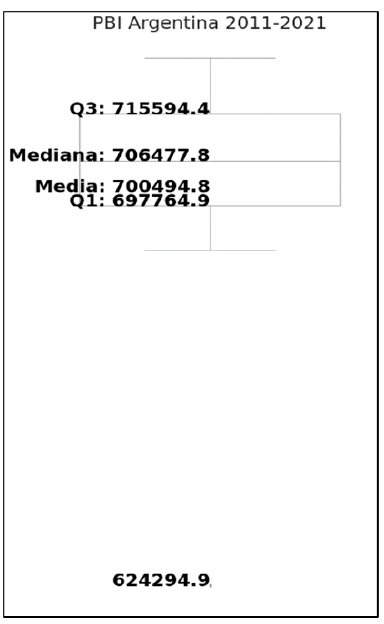


A) “Puede afirmarse que existe una alta variabilidad en
la distribución del PBI de Argentina”

B) “El valor atípico que se observa es moderado”

C) “La distribución del PBI es asimétrica positiva”

D) “Sabiendo que el coeficiente de curtosis es igual a
3,42, es posible afirmar que la distribución es
leptocúrtica”

In [ ]:
A=input('Puede afirmarse que existe una alta variabilidad en la distribución del PBI de Argentina ')
B=input('El valor atípico que se observa es moderado ')
C=input('La distribución del PBI es asimétrica positiva ')
D=input('Sabiendo que el coeficiente de curtosis es igual a 3,42, es posible afirmar que la distribución es leptocúrtica ')

Puede afirmarse que existe una alta variabilidad en la distribución del PBI de Argentina FALSO
El valor atípico que se observa es moderado FALSO, PORQUE UMBRAL INFERIOR = 644276.6453180001, POR TANTO SEVERO
La distribución del PBI es asimétrica positiva FALSO, ASIMÉTRICA NEGATIVA PORQUE MEDIANA MAYOR A MEDIA
Sabiendo que el coeficiente de curtosis es igual a 3,42, es posible afirmar que la distribución es leptocúrtica VERDADERO, PORQUE COEF CURTOSIS > 3
